In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import metrics

### Dataset

In [2]:
car_data = pd.read_csv('D:\\Study\\Data-Science\\Machine Learning\\Projects\\Dataset\\car data.csv')

In [3]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### Dropping unnecessary columns

In [6]:
# name,year columns are unnecessary to train the model
columns_to_drop = ['Car_Name','Year']
car_data.drop(columns=columns_to_drop,inplace=True)

In [7]:
car_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Encoding categorical columns

In [8]:
car_data['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [9]:
# encoding fuel feature
car_data['Fuel_Type'] = car_data['Fuel_Type'].replace({'Petrol':1,'Diesel':2,'CNG':3})

In [10]:
car_data['Fuel_Type'].value_counts()

1    239
2     60
3      2
Name: Fuel_Type, dtype: int64

In [11]:
car_data['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [12]:
# encoding seller_type feature
car_data['Seller_Type'] = car_data['Seller_Type'].replace({'Dealer':1,'Individual':2})

In [13]:
car_data['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [14]:
# encoding transmission feature
car_data['Transmission'] = car_data['Transmission'].replace({'Manual':1,'Automatic':2})

In [15]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  301 non-null    float64
 1   Present_Price  301 non-null    float64
 2   Kms_Driven     301 non-null    int64  
 3   Fuel_Type      301 non-null    int64  
 4   Seller_Type    301 non-null    int64  
 5   Transmission   301 non-null    int64  
 6   Owner          301 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 16.6 KB


### Seperating independent and dependent features

In [16]:
X=car_data.drop(columns=['Selling_Price'])
y=car_data['Selling_Price']

In [17]:
print(X)

     Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner
0             5.59       27000          1            1             1      0
1             9.54       43000          2            1             1      0
2             9.85        6900          1            1             1      0
3             4.15        5200          1            1             1      0
4             6.87       42450          2            1             1      0
..             ...         ...        ...          ...           ...    ...
296          11.60       33988          2            1             1      0
297           5.90       60000          1            1             1      0
298          11.00       87934          1            1             1      0
299          12.50        9000          2            1             1      0
300           5.90        5464          1            1             1      0

[301 rows x 6 columns]


In [18]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


### Train,Test split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=2)

In [20]:
print(X_train)

     Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner
235           9.40       15141          1            1             1      0
106           3.45       16500          1            2             1      1
10            3.60        2135          1            1             1      0
152           0.99       13000          1            2             1      0
77           12.35      135154          1            1             2      0
..             ...         ...        ...          ...           ...    ...
75            6.80       36000          1            1             1      0
22            8.01       50000          1            1             2      0
72           18.61       56001          1            1             1      0
15           10.79       43000          2            1             1      0
168           0.73       12000          1            2             1      0

[240 rows x 6 columns]


In [21]:
print(y_train)

235    9.10
106    1.35
10     2.85
152    0.50
77     1.50
       ... 
75     3.95
22     4.40
72     7.45
15     7.75
168    0.42
Name: Selling_Price, Length: 240, dtype: float64


In [22]:
print(X_test)

     Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner
99          20.450       50024          2            1             1      0
161          0.826       23000          1            2             1      0
89           6.760       40000          1            1             1      0
30           5.980       51439          2            1             1      0
232         14.790       12900          1            1             2      0
..             ...         ...        ...          ...           ...    ...
172          0.640       13700          1            2             1      0
94          22.780       89000          1            1             2      0
160          0.950       24000          1            2             1      0
199          0.580       53000          1            2             1      0
91          16.090       58242          2            1             1      0

[61 rows x 6 columns]


In [23]:
print(y_test)

99      9.65
161     0.45
89      4.75
30      3.10
232    11.45
       ...  
172     0.40
94      4.00
160     0.45
199     0.12
91     11.25
Name: Selling_Price, Length: 61, dtype: float64


### Model Training

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train,y_train)

LinearRegression()

In [26]:
# For Train Data
y_pred = model.predict(X_train)

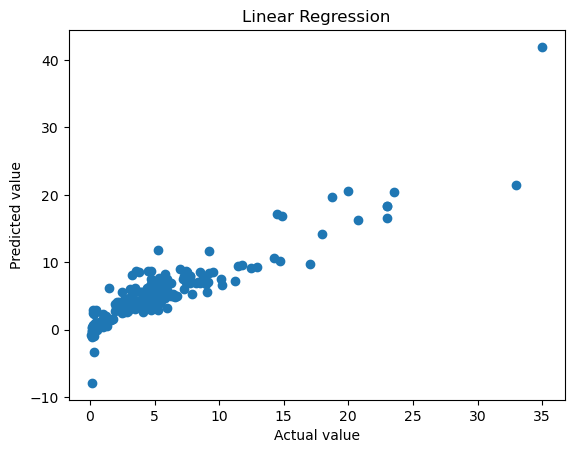

In [27]:
plt.scatter(y_train,y_pred,marker='o')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Linear Regression')
plt.show()

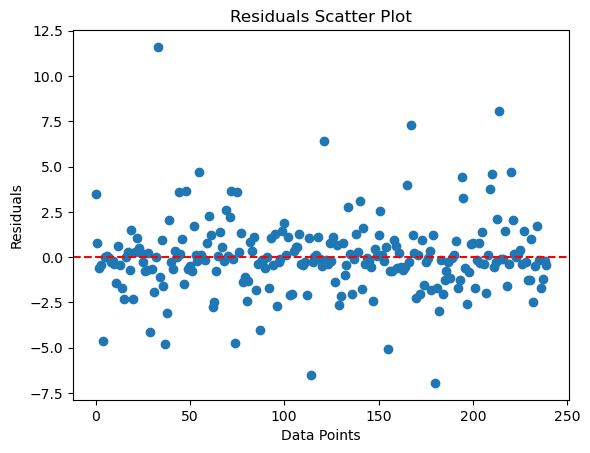

In [28]:
# Checking outliers
residuals = y_train - y_pred
plt.scatter(range(len(residuals)), residuals)
plt.xlabel('Data Points')
plt.ylabel('Residuals')
plt.title('Residuals Scatter Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()


In [29]:
# Cost function
MSE = metrics.mean_squared_error(y_train,y_pred)
print('MSE:',MSE)
MAE = metrics.mean_absolute_error(y_train,y_pred)
print('MAE:',MAE)

MSE: 4.209121034730229
MAE: 1.3207745422554422


In [30]:
# Accurace for train data
r2_simple_lr = metrics.r2_score(y_train,y_pred)
print('R2 score for simple linear regression: ',r2_simple_lr)

R2 score for simple linear regression:  0.8475276780278138


In [31]:
# For Test Data
y_pred_test = model.predict(X_test)

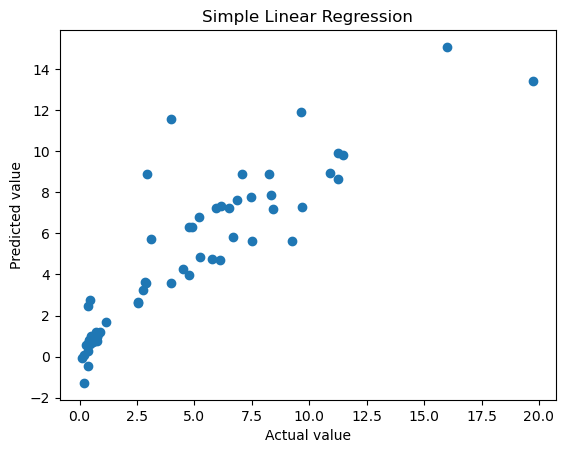

In [32]:
plt.scatter(y_test,y_pred_test,marker='o')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Simple Linear Regression')
plt.show()

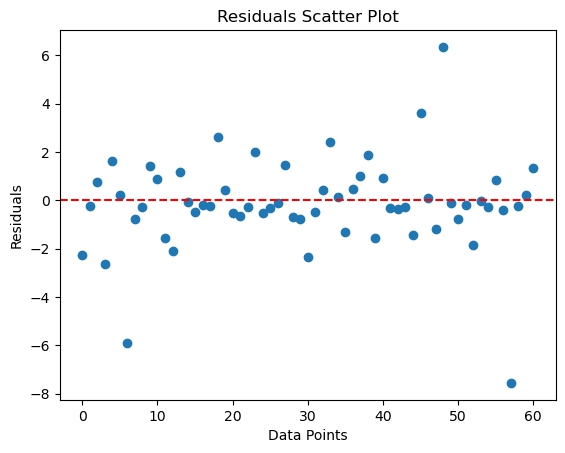

In [33]:
# Checking outliers for test data
residuals = y_test - y_pred_test
plt.scatter(range(len(residuals)), residuals)
plt.xlabel('Data Points')
plt.ylabel('Residuals')
plt.title('Residuals Scatter Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()


In [34]:
# Accuracy for test data
r2_simple_lr = metrics.r2_score(y_test,y_pred_test)
print('R2 score for simple linear regression: ',r2_simple_lr)

R2 score for simple linear regression:  0.8029339126904588


## Ridge Regression

In [35]:
model2 = Ridge()

In [36]:
model2.fit(X_train,y_train)

Ridge()

In [37]:
# For Train Data
y_pred = model2.predict(X_train)

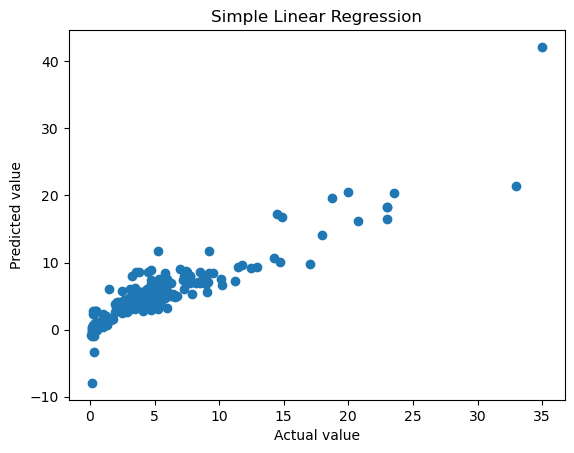

In [38]:
plt.scatter(y_train,y_pred,marker='o')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Ridge Regression')
plt.show()

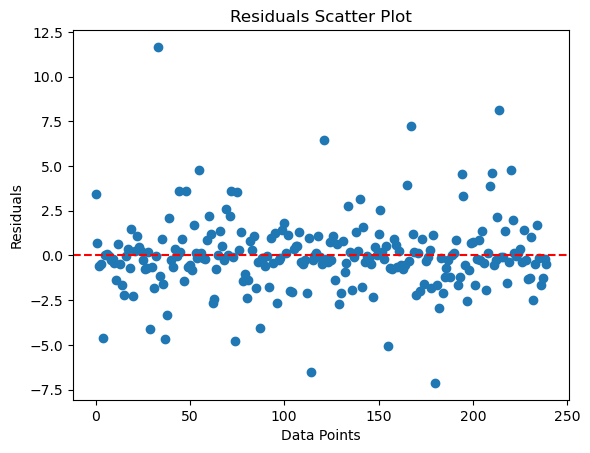

In [39]:
# Checking outliers
residuals = y_train - y_pred
plt.scatter(range(len(residuals)), residuals)
plt.xlabel('Data Points')
plt.ylabel('Residuals')
plt.title('Residuals Scatter Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()


In [40]:
# Cost function
MSE = metrics.mean_squared_error(y_train,y_pred)
print('MSE:',MSE)
MAE = metrics.mean_absolute_error(y_train,y_pred)
print('MAE:',MAE)

MSE: 4.210779750755276
MAE: 1.3152826963939501


In [41]:
# Accuracy for train data
r2_simple_lr = metrics.r2_score(y_train,y_pred)
print('R2 score for Ridge regression: ',r2_simple_lr)

R2 score for Ridge regression:  0.8474675922565222


In [42]:
# For Test Data
y_pred_test = model2.predict(X_test)

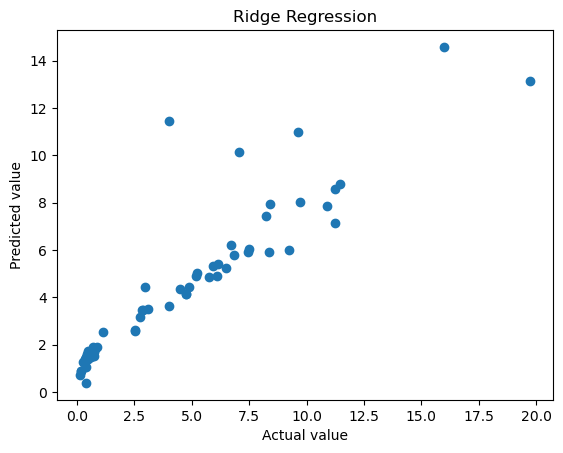

In [79]:
plt.scatter(y_test,y_pred_test,marker='o')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Ridge Regression')
plt.show()

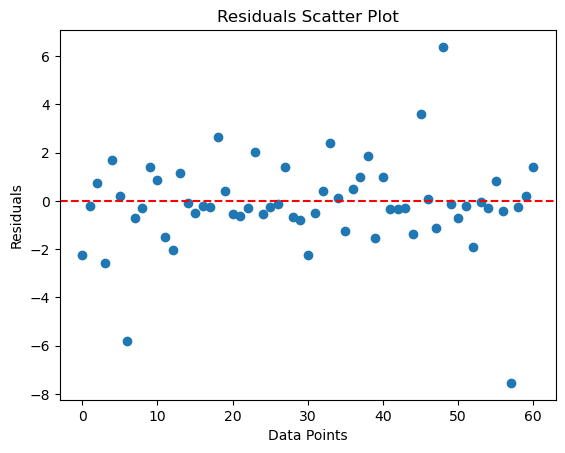

In [44]:
# Checking outliers for test data
residuals = y_test - y_pred_test
plt.scatter(range(len(residuals)), residuals)
plt.xlabel('Data Points')
plt.ylabel('Residuals')
plt.title('Residuals Scatter Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()


In [45]:
# Accuracy for test data
r2_simple_lr = metrics.r2_score(y_test,y_pred_test)
print('R2 score for Ridge regression: ',r2_simple_lr)

R2 score for Ridge regression:  0.8056531000886898


## Lasso Regression

In [46]:
model3 = Lasso()

In [47]:
model3.fit(X_train,y_train)

Lasso()

In [48]:
# For Train Data
y_pred = model3.predict(X_train)

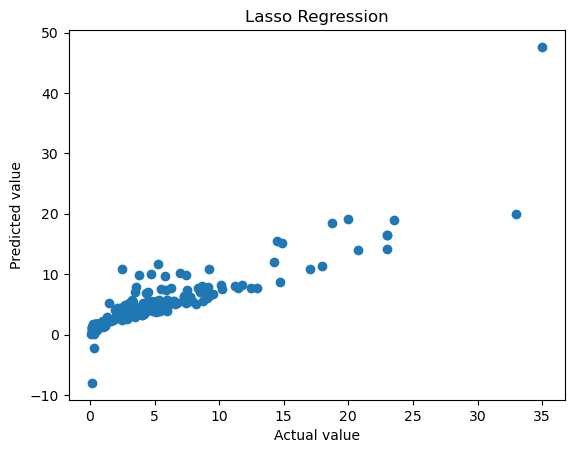

In [80]:
plt.scatter(y_train,y_pred,marker='o')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Lasso Regression')
plt.show()

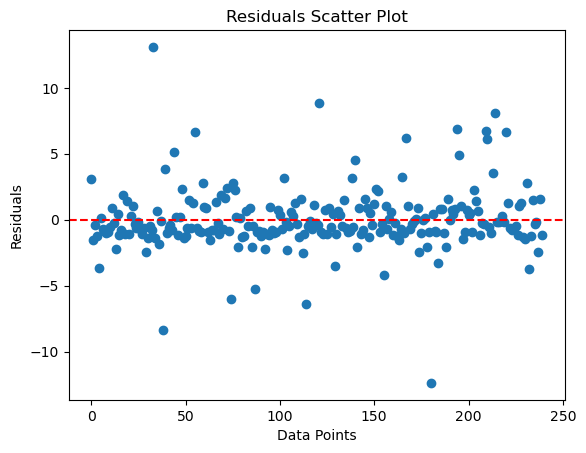

In [50]:
# Checking outliers
residuals = y_train - y_pred
plt.scatter(range(len(residuals)), residuals)
plt.xlabel('Data Points')
plt.ylabel('Residuals')
plt.title('Residuals Scatter Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()


In [51]:
# Cost function
MSE = metrics.mean_squared_error(y_train,y_pred)
print('MSE:',MSE)
MAE = metrics.mean_absolute_error(y_train,y_pred)
print('MAE:',MAE)

MSE: 5.75236540192578
MAE: 1.518473956473041


In [52]:
# Accuracy for train data
r2_simple_lr = metrics.r2_score(y_train,y_pred)
print('R2 score for Ridge regression: ',r2_simple_lr)

R2 score for Ridge regression:  0.7916247828401292


In [64]:
# For Test Data
y_pred_test = model3.predict(X_test)

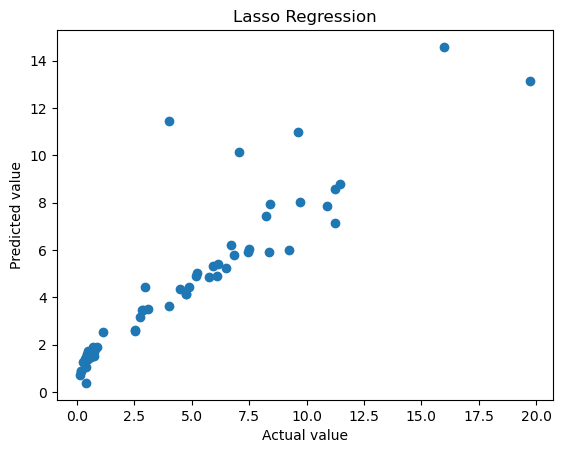

In [81]:
plt.scatter(y_test,y_pred_test,marker='o')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Lasso Regression')
plt.show()

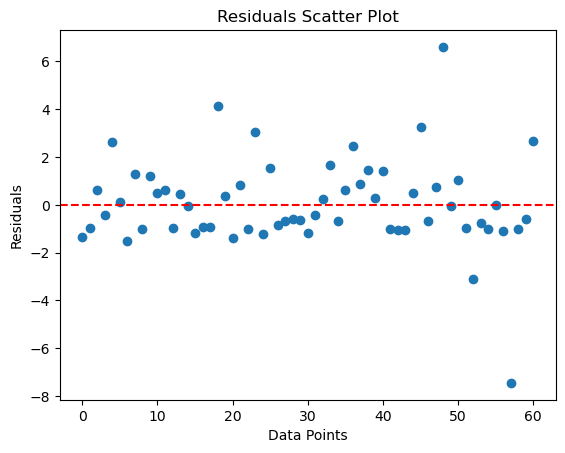

In [82]:
# Checking outliers for test data
residuals = y_test - y_pred_test
plt.scatter(range(len(residuals)), residuals)
plt.xlabel('Data Points')
plt.ylabel('Residuals')
plt.title('Residuals Scatter Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()


In [67]:
# Accuracy for test data
r2_simple_lr = metrics.r2_score(y_test,y_pred_test)
print('R2 score for Ridge regression: ',r2_simple_lr)

R2 score for Ridge regression:  0.8106390372932804


## ElasticNet

In [68]:
model4 = ElasticNet()

In [69]:
model4.fit(X_train,y_train)

ElasticNet()

In [70]:
# For Train Data
y_pred = model4.predict(X_train)

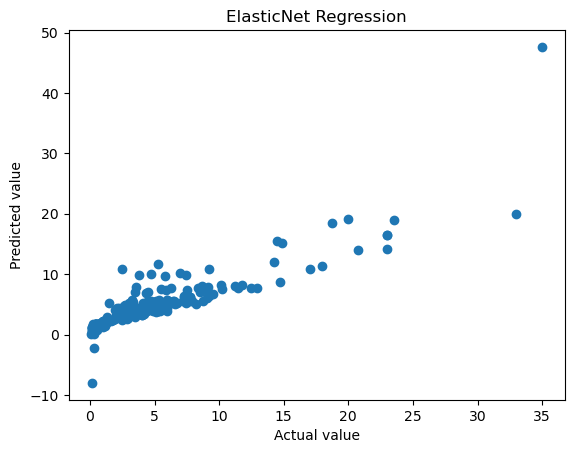

In [83]:
plt.scatter(y_train,y_pred,marker='o')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('ElasticNet Regression')
plt.show()

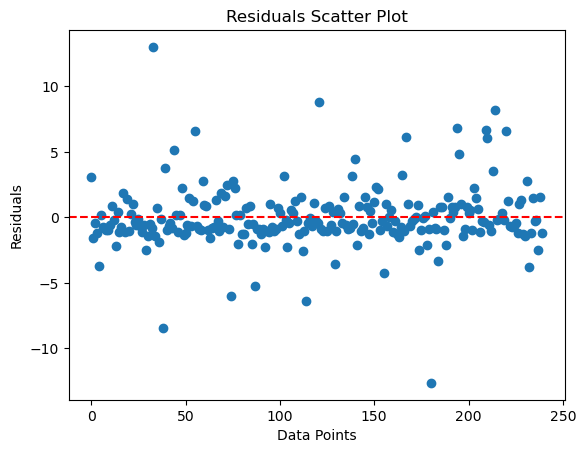

In [72]:
# Checking outliers
residuals = y_train - y_pred
plt.scatter(range(len(residuals)), residuals)
plt.xlabel('Data Points')
plt.ylabel('Residuals')
plt.title('Residuals Scatter Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()


In [73]:
# Cost function
MSE = metrics.mean_squared_error(y_train,y_pred)
print('MSE:',MSE)
MAE = metrics.mean_absolute_error(y_train,y_pred)
print('MAE:',MAE)

MSE: 5.746999317275304
MAE: 1.5118437872641493


In [74]:
# Accuracy for train data
r2_simple_lr = metrics.r2_score(y_train,y_pred)
print('R2 score for Ridge regression: ',r2_simple_lr)

R2 score for Ridge regression:  0.7918191653204159


In [75]:
# For Test Data
y_pred_test = model4.predict(X_test)

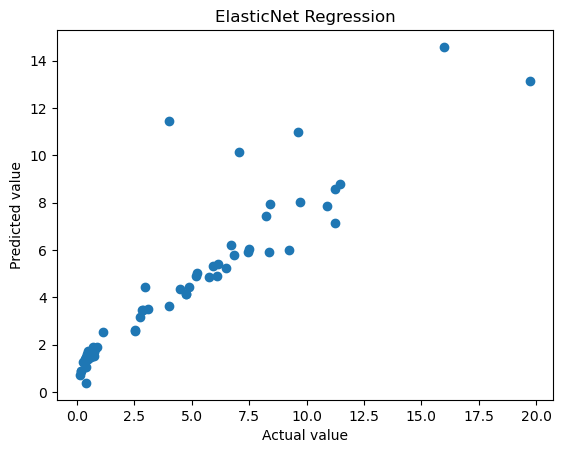

In [84]:
plt.scatter(y_test,y_pred_test,marker='o')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('ElasticNet Regression')
plt.show()

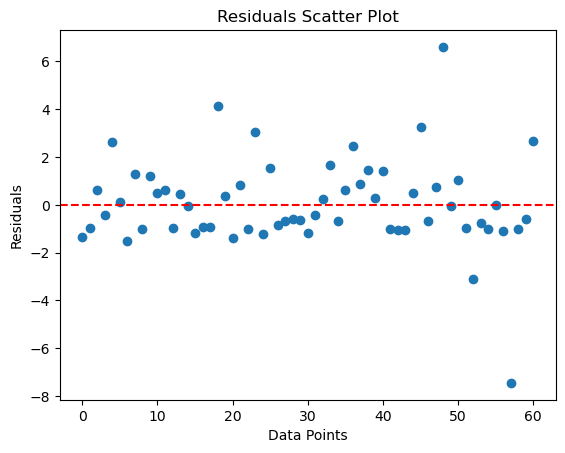

In [85]:
# Checking outliers for test data
residuals = y_test - y_pred_test
plt.scatter(range(len(residuals)), residuals)
plt.xlabel('Data Points')
plt.ylabel('Residuals')
plt.title('Residuals Scatter Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()


In [86]:
# Accuracy for test data
r2_simple_lr = metrics.r2_score(y_test,y_pred_test)
print('R2 score for Ridge regression: ',r2_simple_lr)

R2 score for Ridge regression:  0.8120492189635475
